
11490434/11490434 [==============================] - 4s 0us/step


Epoch 1/10


422/422 [==============================] - 6s 8ms/step - loss: 0.3575 - accuracy: 0.8999 - val_loss: 0.1382 - val_accuracy: 0.9638
Epoch 2/10
422/422 [==============================] - 3s 6ms/step - loss: 0.1449 - accuracy: 0.9576 - val_loss: 0.1175 - val_accuracy: 0.9648
Epoch 3/10
422/422 [==============================] - 3s 6ms/step - loss: 0.1013 - accuracy: 0.9701 - val_loss: 0.0886 - val_accuracy: 0.9727
Epoch 4/10
422/422 [==============================] - 3s 6ms/step - loss: 0.0770 - accuracy: 0.9768 - val_loss: 0.0806 - val_accuracy: 0.9762
Epoch 5/10
422/422 [==============================] - 2s 6ms/step - loss: 0.0605 - accuracy: 0.9816 - val_loss: 0.0823 - val_accuracy: 0.9775
Epoch 6/10
422/422 [==============================] - 3s 6ms/step - loss: 0.0480 - accuracy: 0.9852 - val_loss: 0.0696 - val_accuracy: 0.9797
Epoch 7/10
422/422 [==============================] - 3s 6ms/step - loss: 0.03

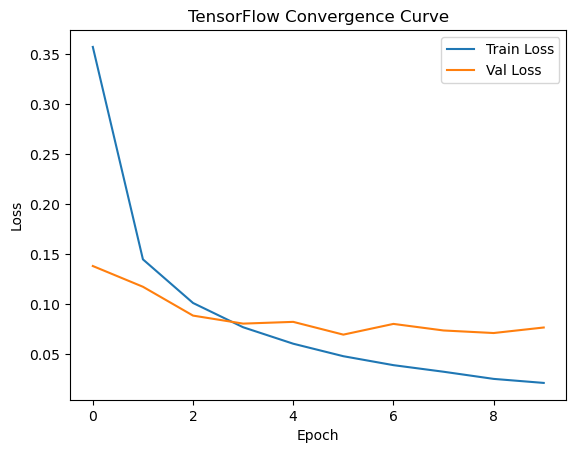

In [1]:
# TensorFlow Neural Network Example
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# Model
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train and track history
history = model.fit(x_train, y_train, validation_split=0.1, epochs=10, batch_size=128)

# Plot convergence curve
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("TensorFlow Convergence Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [4]:
!pip install torchvision


Defaulting to user installation because normal site-packages is not writeable
  Using cached torchvision-0.22.1-cp310-cp310-win_amd64.whl (1.7 MB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.7/1.7 MB 4.9 MB/s eta 0:00:00
     -------------------------------------- 216.1/216.1 MB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 6.3/6.3 MB 4.1 MB/s eta 0:00:00


Epoch 1: Loss=0.7067, Grad Norm=0.2242
Epoch 11: Loss=0.6809, Grad Norm=0.1961
Epoch 21: Loss=0.6621, Grad Norm=0.1837
Epoch 31: Loss=0.6450, Grad Norm=0.1832
Epoch 41: Loss=0.6276, Grad Norm=0.1879
Epoch 51: Loss=0.6093, Grad Norm=0.1943
Epoch 61: Loss=0.5897, Grad Norm=0.2004
Epoch 71: Loss=0.5689, Grad Norm=0.2062
Epoch 81: Loss=0.5471, Grad Norm=0.2107
Epoch 91: Loss=0.5244, Grad Norm=0.2138


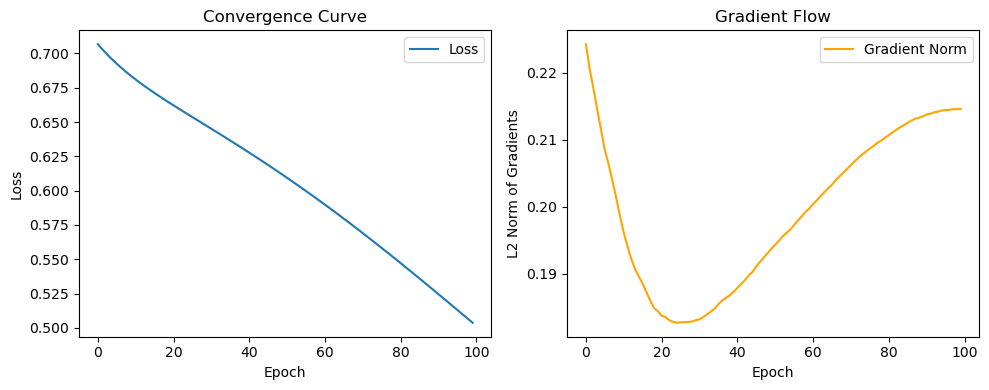

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic dataset: binary classification (2 classes)
np.random.seed(0)
X = np.random.randn(500, 2)
y = (X[:, 0] * X[:, 1] > 0).astype(int)  # Simple non-linear pattern

# One-hot encode labels
Y = np.zeros((y.size, 2))
Y[np.arange(y.size), y] = 1

# Initialize weights
def init_weights(input_dim, hidden_dim, output_dim):
    W1 = np.random.randn(input_dim, hidden_dim) * 0.1
    b1 = np.zeros((1, hidden_dim))
    W2 = np.random.randn(hidden_dim, output_dim) * 0.1
    b2 = np.zeros((1, output_dim))
    return W1, b1, W2, b2

# Activation function and softmax
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Loss function (cross-entropy)
def cross_entropy(pred, target):
    return -np.mean(np.sum(target * np.log(pred + 1e-9), axis=1))

# Train
W1, b1, W2, b2 = init_weights(2, 64, 2)
lr = 0.1
losses = []
grad_norms = []

for epoch in range(100):
    # Forward pass
    Z1 = X.dot(W1) + b1
    A1 = relu(Z1)
    Z2 = A1.dot(W2) + b2
    A2 = softmax(Z2)
    loss = cross_entropy(A2, Y)
    losses.append(loss)
    
    # Backpropagation
    dZ2 = A2 - Y
    dW2 = A1.T.dot(dZ2) / X.shape[0]
    db2 = np.sum(dZ2, axis=0, keepdims=True) / X.shape[0]
    
    dA1 = dZ2.dot(W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = X.T.dot(dZ1) / X.shape[0]
    db1 = np.sum(dZ1, axis=0, keepdims=True) / X.shape[0]

    # Gradient norm
    grad_norm = np.linalg.norm(dW1) + np.linalg.norm(dW2)
    grad_norms.append(grad_norm)

    # Update weights
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

    if epoch % 10 == 0:
        print(f"Epoch {epoch+1}: Loss={loss:.4f}, Grad Norm={grad_norm:.4f}")

# Plot
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(losses, label='Loss')
plt.title("Convergence Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(grad_norms, label='Gradient Norm', color='orange')
plt.title("Gradient Flow")
plt.xlabel("Epoch")
plt.ylabel("L2 Norm of Gradients")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Synthetic data
np.random.seed(0)
X = np.random.randn(1000, 2)
y = (X[:, 0] * X[:, 1] > 0).astype(int)
Y = np.zeros((y.size, 2))
Y[np.arange(y.size), y] = 1

# Hyperparameters
input_dim = 2
hidden1 = 64
hidden2 = 32
output_dim = 2
epochs = 100
batch_size = 64
lr = 0.1
lr_decay = 0.99  # Learning rate decay

# Weight Initialization
def init_weights():
    W1 = np.random.randn(input_dim, hidden1) * 0.1
    b1 = np.zeros((1, hidden1))
    W2 = np.random.randn(hidden1, hidden2) * 0.1
    b2 = np.zeros((1, hidden2))
    W3 = np.random.randn(hidden2, output_dim) * 0.1
    b3 = np.zeros((1, output_dim))
    return W1, b1, W2, b2, W3, b3

W1, b1, W2, b2, W3, b3 = init_weights()

# Activation and loss
def relu(z): return np.maximum(0, z)
def relu_deriv(z): return (z > 0).astype(float)
def softmax(z): exp = np.exp(z - np.max(z, axis=1, keepdims=True)); return exp / np.sum(exp, axis=1, keepdims=True)
def cross_entropy(pred, target): return -np.mean(np.sum(target * np.log(pred + 1e-9), axis=1))

# Accuracy
def accuracy(pred, target): return np.mean(np.argmax(pred, axis=1) == np.argmax(target, axis=1))

# Training loop
losses, accs, grad_norms = [], [], []

for epoch in range(epochs):
    perm = np.random.permutation(len(X))
    X_shuffled = X[perm]
    Y_shuffled = Y[perm]

    total_loss = 0
    total_acc = 0
    total_grad_norm = 0

    for i in range(0, len(X), batch_size):
        x_batch = X_shuffled[i:i+batch_size]
        y_batch = Y_shuffled[i:i+batch_size]

        # Forward
        z1 = x_batch @ W1 + b1
        a1 = relu(z1)
        z2 = a1 @ W2 + b2
        a2 = relu(z2)
        z3 = a2 @ W3 + b3
        a3 = softmax(z3)

        loss = cross_entropy(a3, y_batch)
        total_loss += loss
        total_acc += accuracy(a3, y_batch)

        # Backward
        dz3 = a3 - y_batch
        dW3 = a2.T @ dz3 / batch_size
        db3 = np.sum(dz3, axis=0, keepdims=True) / batch_size

        da2 = dz3 @ W3.T
        dz2 = da2 * relu_deriv(z2)
        dW2 = a1.T @ dz2 / batch_size
        db2 = np.sum(dz2, axis=0, keepdims=True) / batch_size

        da1 = dz2 @ W2.T
        dz1 = da1 * relu_deriv(z1)
        dW1 = x_batch.T @ dz1 / batch_size
        db1 = np.sum(dz1, axis=0, keepdims=True) / batch_size

        # Gradient norm
        grad_norm = np.linalg.norm(dW1) + np.linalg.norm(dW2) + np.linalg.norm(dW3)
        total_grad_norm += grad_norm

        # Update
        W1 -= lr * dW1
        b1 -= lr * db1
        W2 -= lr * dW2
        b2 -= lr * db2
        W3 -= lr * dW3
        b3 -= lr * db3

    # Scheduler
    lr *= lr_decay

    avg_loss = total_loss / (len(X) / batch_size)
    avg_acc = total_acc / (len(X) / batch_size)
    avg_grad = total_grad_norm / (len(X) / batch_size)

    losses.append(avg_loss)
    accs.append(avg_acc)
    grad_norms.append(avg_grad)

    if epoch % 10 == 0:
        print(f"Epoch {epoch+1}: Loss={avg_loss:.4f}, Accuracy={avg_acc:.4f}, GradNorm={avg_grad:.4f}, LR={lr:.4f}")

# Plot
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(losses, label='Loss')
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(accs, label='Accuracy', color='green')
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(grad_norms, label='Gradient Norm', color='orange')
plt.title("Gradient Flow")
plt.xlabel("Epoch")
plt.ylabel("Grad Norm")
plt.legend()

plt.tight_layout()
plt.show()
